# **Apex Legends K/D Prediction Project**

# **Imports**

In [1]:
#Numpy
import numpy as np
from numpy import median

#Pandas
import pandas as pd

#Seaborn
import seaborn as sns

#matplotlib
import matplotlib.pyplot as plt

#Sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Scipy
from scipy.sparse import csr_matrix

#Warnings
import warnings
warnings.filterwarnings("ignore")

## **Loading Data**

In [2]:
#Loading in the data
joe_df= pd.read_csv("/Users/davyd/OneDrive/Documents/Apex_Data_Joe.csv")
joe_df.info()
joe_df.head(25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Season               24 non-null     object 
 1   Total Damage         24 non-null     int64  
 2   Total Kills          24 non-null     int64  
 3   Total Deaths         24 non-null     int64  
 4   K/D Ratio            24 non-null     float64
 5   Total wins           24 non-null     int64  
 6   Total Top 5 finish   24 non-null     int64  
 7   Total Games Played   24 non-null     int64  
 8   Highest Kills        24 non-null     int64  
 9   Knockdowns           24 non-null     int64  
 10  Assists              24 non-null     int64  
 11  Teamates Revived     24 non-null     int64  
 12  Allayna Playing      24 non-null     object 
 13  Teammates Respawned  24 non-null     int64  
 14  Win Streak           23 non-null     float64
 15  Ranked Split 1       11 non-null     objec

,Season,Total Damage,Total Kills,Total Deaths,K/D Ratio,Total wins,Total Top 5 finish,Total Games Played,Highest Kills,Knockdowns,Assists,Teamates Revived,Allayna Playing,Teammates Respawned,Win Streak,Ranked Split 1,Ranked Split 2,Win rate%
0,5,8332,20,50,0.40,1,12,49,5,21,12,6,no,0,1.0,NaN,NaN,2.04%
1,6,2945,7,16,0.44,0,2,15,2,7,2,0,no,0,0.0,NaN,NaN,0%
2,7,111421,234,543,0.43,19,139,525,5,318,179,68,no,15,2.0,NaN,NaN,3.62%
3,7R,32709,68,169,0.40,6,51,167,4,89,47,24,no,5,2.0,gold 4,silver 4,3.59%
4,8,168498,383,811,0.47,24,200,773,8,522,271,144,no,31,2.0,NaN,NaN,3.10%
5,8R,55867,127,308,0.41,8,72,292,5,182,96,50,no,9,2.0,bronze 1,gold 4,2.74%
6,9,103180,261,404,0.65,21,118,408,7,354,159,101,no,19,2.0,NaN,NaN,5.15%
7,9R,18689,49,66,0.74,9,28,64,4,62,29,17,no,3,2.0,bronze2,gold 4,14.06%
8,10,64975,164,245,0.67,13,68,242,5,210,91,54,no,3,1.0,NaN,NaN,5.37%
9,10R,5910,11,16,0.69,1,4,15,3,12,8,3,no,0,1.0,silver 4,bronze4,6.67%


## **Feature Engineering**

In [3]:
# This column is double checking the math of the K/D Ratio to be sure the game is calculating it correctly.
joe_df['Cal K/D'] = joe_df['Total Kills']/joe_df['Total Deaths']

In [4]:
# This column was created to see the percent of games I placed in the top five within the given season.
joe_df['Top 5 %'] = joe_df['Total Top 5 finish']/joe_df['Total Games Played']

In [5]:
# This column was created to see the ratio of kills for the number of 'knocks'. 
joe_df['kill/knock ratio'] = joe_df['Total Kills']/joe_df['Knockdowns']

In [6]:
# This column was created to see an overall average number of 'knocks' per match in a given season.
joe_df['GamesPlayed/knock ratio'] = joe_df['Total Games Played']/joe_df['Knockdowns']

In [7]:
# This column was created to see an overall average number of assists per match in a given season.
joe_df['Average assists per match'] = joe_df['Assists']/joe_df['Total Games Played']

In [8]:
# This column was created to see an overall average number of damage per match in a given season.
joe_df['Average damage per match'] = joe_df['Total Damage']/joe_df['Total Games Played']

In [9]:
# This column was created to see an overall average number of 'knocks' per match in the given season.
joe_df['GamesPlayed/knock ratio'] = joe_df['Knockdowns']/joe_df['Total Games Played']

In [10]:
# Write a filter to put only ranked seasons in a temporary dataframe.
# Then write out an order of the ranks so that predictions can be made.

In [11]:
# Printing out the new data frame with the added columns
joe_df.describe()

,Total Damage,Total Kills,Total Deaths,K/D Ratio,Total wins,Total Top 5 finish,Total Games Played,Highest Kills,Knockdowns,Assists,Teamates Revived,Teammates Respawned,Win Streak,Cal K/D,Top 5 %,kill/knock ratio,GamesPlayed/knock ratio,Average assists per match,Average damage per match
count,24.000000,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,23.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,180922.250000,389.75000,599.916667,0.593333,25.666667,162.125000,596.416667,6.041667,514.583333,279.708333,138.375000,36.666667,1.521739,0.593106,0.279056,0.769964,0.791535,0.438020,287.760145
std,197285.286066,440.41248,590.783556,0.134639,26.927708,158.756119,598.432875,2.330873,567.830572,315.886397,141.081787,43.187827,0.593109,0.133807,0.053486,0.081335,0.164007,0.124075,61.952748
min,2945.000000,7.00000,16.000000,0.400000,0.000000,2.000000,15.000000,2.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.400000,0.133333,0.689362,0.428571,0.133333,170.040816
25%,53055.250000,97.50000,165.000000,0.462500,7.500000,49.000000,164.250000,4.750000,140.750000,83.750000,44.250000,5.000000,1.000000,0.463567,0.250240,0.721280,0.674221,0.352963,244.163943
50%,99922.500000,177.50000,343.500000,0.595000,15.000000,94.500000,321.500000,5.000000,252.500000,163.500000,76.500000,22.500000,2.000000,0.593652,0.276778,0.746630,0.830551,0.453222,301.154898
75%,253666.250000,557.50000,865.250000,0.675000,38.000000,233.500000,852.250000,7.250000,748.000000,377.000000,212.000000,59.000000,2.000000,0.673916,0.304721,0.786866,0.907713,0.510831,321.649749
max,593401.000000,1320.00000,1763.000000,0.830000,93.000000,556.000000,1778.000000,11.000000,1680.000000,1195.000000,466.000000,173.000000,2.000000,0.830065,0.437500,1.000000,1.019096,0.673619,394.000000


In [12]:
#Saving the new dataframe to upload for other platforms.
joe_df.to_csv('Joe_data_frame', index=False)

In [13]:
# Calculate the average number of kills per season.
avK = joe_df["Total Kills"].mean()

# Convert the average number of kills per season into an integer.
avK_int = int(avK)

# Print the average number of kills in a season.
print("The average number of total kills per season is:", avK_int, "-ouch")

The average number of total kills per season is: 389 -ouch


In [14]:
# Calculating the average damage per season.
avd = joe_df["Total Damage"].mean()

# Convert the average to an integer
avd_int = int(avd)

# Print the average total damage per season
print("The average total damage per season overall is:", avd_int)

The average total damage per season overall is: 180922


In [15]:
# Finding the average number of Top 5 finishes per season
av5 = joe_df["Total Top 5 finish"].mean()

# Convert the mean value to an integer
av5_int = int(av5)

# Print the average number of top time finishes per season
print("The average number of total top 5 finishes per season is:", av5_int)

The average number of total top 5 finishes per season is: 162


In [16]:
# Create a DataFrame to prepare for modeling
joe_df = pd.DataFrame(joe_df)

In [17]:
# Identify rows with "r" in any column
rows_to_drop = joe_df.apply(lambda row: any(row.astype(str).str.contains('R')), axis=1)

In [18]:
# Drop specified rows and columns
df_cleaned = joe_df[~rows_to_drop]

In [19]:
# Columns to eliminate (these columns have nothing to do with making predictions)
columns_to_eliminate = ['Allayna Playing', 'Ranked Split 1', 'Ranked Split 2', 'Win Streak']

In [20]:
# Drop specified columns
df_cleaned = df_cleaned.drop(columns=columns_to_eliminate)

In [21]:
# Remove the percentage sign and convert to float
df_cleaned['Win rate%'] = df_cleaned['Win rate%'].str.rstrip('%').astype(float)

In [22]:
# Show the changes made to the dataframe
print("\nCleaned DataFrame:")
print(df_cleaned)


Cleaned DataFrame:
   Season  Total Damage  Total Kills  Total Deaths  K/D Ratio  Total wins  \
0       5          8332           20            50       0.40           1   
1       6          2945            7            16       0.44           0   
2       7        111421          234           543       0.43          19   
4       8        168498          383           811       0.47          24   
6       9        103180          261           404       0.65          21   
8      10         64975          164           245       0.67          13   
10     11        245509          549           825       0.67          37   
12     12        411927          879          1357       0.65          52   
14     13        527042         1093          1660       0.66          58   
16     14        558027         1320          1763       0.75          73   
18     15        561126         1232          1528       0.81          80   
20     16        278138          583           986      

In [23]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 22
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season                     13 non-null     object 
 1   Total Damage               13 non-null     int64  
 2   Total Kills                13 non-null     int64  
 3   Total Deaths               13 non-null     int64  
 4   K/D Ratio                  13 non-null     float64
 5   Total wins                 13 non-null     int64  
 6   Total Top 5 finish         13 non-null     int64  
 7   Total Games Played         13 non-null     int64  
 8   Highest Kills              13 non-null     int64  
 9   Knockdowns                 13 non-null     int64  
 10  Assists                    13 non-null     int64  
 11  Teamates Revived           13 non-null     int64  
 12  Teammates Respawned        13 non-null     int64  
 13  Win rate%                  13 non-null     float64
 

In [24]:
df = df_cleaned

# **Predictive Model**

## **Validation Split**

In [25]:
# Drop the target column to separate it from the features
X = df.drop(columns='Total Kills')
y = df['Total Kills']

In [26]:
#Split training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## **Preprocessing**

In [27]:
#Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy= 'mean')

#Scaler
scaler = StandardScaler()

#OneHotEncoder
ohe =OneHotEncoder(handle_unknown='ignore', sparse=True)

#Create Selectors
cat_selector = make_column_selector(dtype_include= 'object')
num_selector = make_column_selector(dtype_include='number')

# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

#cat pipe
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

#Make tuples for preprocessing the categorical and numeric columns
num_tuple = (numeric_pipe, num_selector)
cat_tuple = (categorical_pipe, cat_selector)  

In [28]:
#Create Column Transformer
preprocessor= make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')

In [29]:
# Preprocess the data
# Fit and transform the preprocessing on the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Transform the test data using the fitted preprocessor
X_test_preprocessed = preprocessor.transform(X_test)

In [30]:
# Looking at how the preprocessor is organized
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000028F6364C970>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000028F6364F3A0>)])

In [31]:
# Ensuring the shape is correct
print("X_train_preprocessed shape:", X_train_preprocessed.shape)
print("y_train shape:", y_train.shape)

X_train_preprocessed shape: (9, 27)
y_train shape: (9,)


# **Linear Regression Model**

In [32]:
# Fit and transform the preprocessing on the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Transform the test data using the fitted preprocessor
X_test_preprocessed = preprocessor.transform(X_test)

# Create a LinearRegression model
regressor = LinearRegression()

# Train the model using the preprocessed training sets
regressor.fit(X_train_preprocessed, y_train)

# Make predictions for training data
y_predictions_train = regressor.predict(X_train_preprocessed)

# Make predictions on the test set
y_pred = regressor.predict(X_test_preprocessed)

In [33]:
# Print the actual predictions for the training data
print("Predictions for Training Data:")
for actual, prediction in zip(y_train, y_predictions_train):
    print(f"Actual: {actual:.2f}, Predicted: {prediction:.2f}")

# Print the actual predictions for the test data
print("\nPredictions for Test Data:")
for actual, prediction in zip(y_test, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {prediction:.2f}")

Predictions for Training Data:
Actual: 164.00, Predicted: 164.00
Actual: 234.00, Predicted: 234.00
Actual: 7.00, Predicted: 7.00
Actual: 1320.00, Predicted: 1320.00
Actual: 261.00, Predicted: 261.00
Actual: 879.00, Predicted: 879.00
Actual: 1232.00, Predicted: 1232.00
Actual: 383.00, Predicted: 383.00
Actual: 549.00, Predicted: 549.00

Predictions for Test Data:
Actual: 583.00, Predicted: 613.13
Actual: 1320.00, Predicted: 1203.32
Actual: 20.00, Predicted: -10.23
Actual: 1093.00, Predicted: 1082.79


In [34]:
#Function for evaluating Model preformance
def evaluate_model(y_true, y_pred, split='training'):
  """ prints RMSE, and R2 metrics, include which data split was evaluated

  Args:
    y_true: y-train or y-test
    y_pred: result of model.predict(X)
    split: which data split is being evaluate ['training','test']
  """

  r2 = r2_score(y_true,y_pred)
  mae = mean_absolute_error(y_true,y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true,y_pred,squared=False)


  print(f'Results for {split} data:')
  print(f"  - R^2 = {round(r2,3)}")
  print(f"  - MAE = {round(mae,3)}")
  print(f"  - MSE = {round(mse,3)}")
  print(f"  - RMSE = {round(rmse,3)}")
  print()

In [35]:
## Evaluate model's performance
evaluate_model(y_train, y_predictions_train,split='training')
evaluate_model(y_test, y_pred,split='testing')

Results for training data:
  - R^2 = 1.0
  - MAE = 0.0
  - MSE = 0.0
  - RMSE = 0.0

Results for testing data:
  - R^2 = 0.985
  - MAE = 46.811
  - MSE = 3885.088
  - RMSE = 62.33



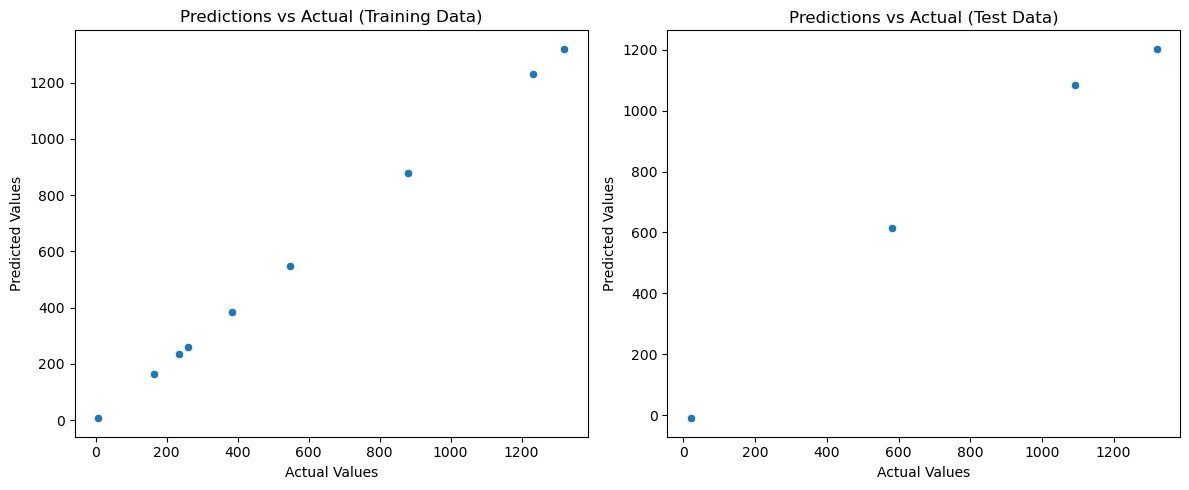

In [36]:
# Set up the figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plt.subplots_adjust(wspace=0.4)  # Adjust spacing between subplots

# Plot for Training Data
sns.scatterplot(x=y_train, y=y_predictions_train, ax=axes[0])
axes[0].set_title("Predictions vs Actual (Training Data)")
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")

# Plot for Test Data
sns.scatterplot(x=y_test, y=y_pred, ax=axes[1])
axes[1].set_title("Predictions vs Actual (Test Data)")
axes[1].set_xlabel("Actual Values")
axes[1].set_ylabel("Predicted Values")

plt.tight_layout()
plt.show()